<a href="https://colab.research.google.com/github/19521309/19521309/blob/main/PythonforML_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

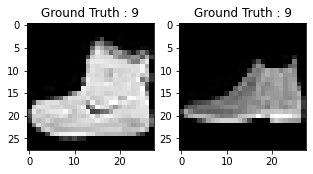

In [4]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [5]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [7]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [9]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [10]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
def Conv2DReluBatchNorm(n_filter, w_filter, h_filter, inputs):
    return BatchNormalization()(Activation(activation='relu')(Convolution2D(n_filter, w_filter, h_filter, border_mode='same')(inputs)))
from keras.layers.advanced_activations import LeakyReLU

In [11]:
batch_size = 64
epochs = 20
num_classes = 10

In [12]:
from keras.layers import AveragePooling2D

In [13]:
fashion_model = Sequential()
fashion_model.add(Conv2D(8, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(8, (3, 3), activation='linear',padding='same'))
fashion_model.add(Conv2D(8, (3, 3), activation='linear',padding='same'))
fashion_model.add(Conv2D(16, (3, 3), activation='linear',padding='same',strides=2))
fashion_model.add(Conv2D(16, (3, 3), activation='linear',padding='same'))
fashion_model.add(Conv2D(16, (3, 3), activation='linear',padding='same'))
fashion_model.add(AveragePooling2D())
fashion_model.add(Flatten())
fashion_model.add(Dense(400, activation='softmax'))                 
fashion_model.add(Dense(num_classes, activation='softmax'))

In [14]:
from tensorflow.keras.optimizers import Adam 


In [15]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(),metrics=['accuracy'])


In [16]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         584       
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 8)         584       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 16)          1168      
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 16)          2320      
                                                        

In [17]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 35s 45ms/step - loss: 1.8943 - accuracy: 0.4279 - val_loss: 1.6367 - val_accuracy: 0.4496
Epoch 2/20
750/750 [==============================] - 32s 43ms/step - loss: 1.4596 - accuracy: 0.4687 - val_loss: 1.3327 - val_accuracy: 0.4868
Epoch 3/20
750/750 [==============================] - 33s 44ms/step - loss: 1.1840 - accuracy: 0.5357 - val_loss: 1.0421 - val_accuracy: 0.5792
Epoch 4/20
750/750 [==============================] - 32s 43ms/step - loss: 0.9737 - accuracy: 0.5781 - val_loss: 0.9351 - val_accuracy: 0.5864
Epoch 5/20
750/750 [==============================] - 32s 43ms/step - loss: 0.8897 - accuracy: 0.5961 - val_loss: 0.8702 - val_accuracy: 0.6166
Epoch 6/20
750/750 [==============================] - 32s 43ms/step - loss: 0.8408 - accuracy: 0.6209 - val_loss: 0.8371 - val_accuracy: 0.6536
Epoch 7/20
750/750 [==============================] - 32s 43ms/step - loss: 0.7939 - accuracy: 0.6634 - val_loss: 0.7549 - val_accuracy:

In [18]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)


In [19]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.35445332527160645
Test accuracy: 0.8792999982833862


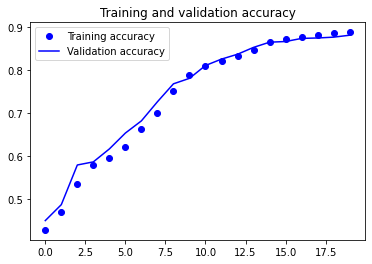

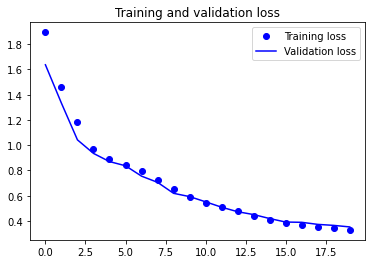

In [22]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
predicted_classes = fashion_model.predict(test_X)


In [24]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [25]:
predicted_classes.shape, test_Y.shape


((10000,), (10000,))

Found 8649 correct labels


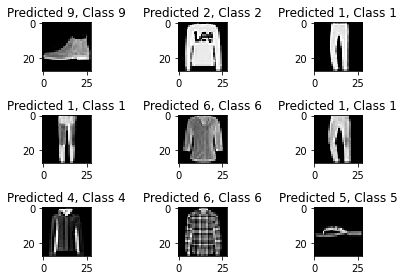

In [27]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 1351 incorrect labels


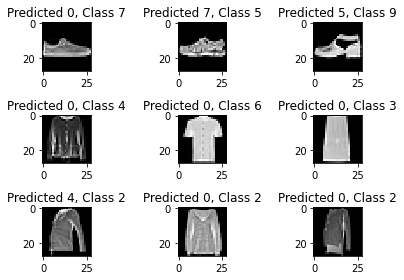

In [29]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [30]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.60      0.91      0.73      1000
     Class 1       1.00      0.96      0.98      1000
     Class 2       0.85      0.79      0.82      1000
     Class 3       0.89      0.86      0.87      1000
     Class 4       0.82      0.81      0.81      1000
     Class 5       0.97      0.92      0.95      1000
     Class 6       0.78      0.53      0.63      1000
     Class 7       0.91      0.95      0.93      1000
     Class 8       0.97      0.96      0.97      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.86     10000
   macro avg       0.88      0.86      0.86     10000
weighted avg       0.88      0.86      0.86     10000

